In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
#load the file 

df = pd.read_excel('data/infrastructure.xlsx',usecols = [0,1,2,3,4,5,6,7,8,29,31],index=False)


In [4]:

df.columns = df.columns.str.replace('$','dollars')
df = df.rename(columns={'Project Value (USdollars Mn)': 'ProjectValue_USdollars_Mn'})

df.head()

,Ref No,Name,Construction Percentage,Country,Industry,Project Status,ProjectValue_USdollars_Mn,Master Project Value (USdollars Mn),Client,City/Province,Industry Type
0,UIS765,Etihad Rail (Emirates Railway Project) - Stage 3,NaN,United Arab Emirates,Infrastructure,Design,1200.0,0.0,"Etihad Rail, Abu Dhabi Department of Transport...",Abu Dhabi,Rail
1,UIS872,Etihad Rail Stage 2 - Package C,NaN,United Arab Emirates,Infrastructure,Design,1400.0,0.0,"Abu Dhabi Department of Transport (DOT), Etiha...",Dubai,Rail
2,UIS871,Etihad Rail Stage 2 - Package B,NaN,United Arab Emirates,Infrastructure,Design,1400.0,0.0,"Etihad Rail, Abu Dhabi Department of Transport...",Abu Dhabi,Rail
3,UIS283,Etihad Rail (Emirates Railway Project),NaN,United Arab Emirates,Infrastructure,Design,3402.0,11000.0,"Etihad Rail, Abu Dhabi Department of Transport...",Abu Dhabi,Rail
4,UPW415,Barakah Nuclear Power Plant in Abu Dhabi,72.0,United Arab Emirates,Power & Water,Construction,2500.0,0.0,Emirates Nuclear Energy Corporation (ENEC),Abu Dhabi,Power Plant


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 11 columns):
Ref No                                 1318 non-null object
Name                                   1318 non-null object
Construction Percentage                822 non-null float64
Country                                1318 non-null object
Industry                               1318 non-null object
Project Status                         1318 non-null object
ProjectValue_USdollars_Mn              1318 non-null float64
Master Project Value (USdollars Mn)    1318 non-null float64
Client                                 1315 non-null object
City/Province                          1303 non-null object
Industry Type                          1318 non-null object
dtypes: float64(3), object(8)
memory usage: 113.3+ KB


In [6]:
df.isnull().sum()

Ref No                                   0
Name                                     0
Construction Percentage                496
Country                                  0
Industry                                 0
Project Status                           0
ProjectValue_USdollars_Mn                0
Master Project Value (USdollars Mn)      0
Client                                   3
City/Province                           15
Industry Type                            0
dtype: int64

In [7]:
#dealing with missing values

df.replace({
    'Construction Percentage': { np.nan : 0 },
    
    
}, inplace=True)

df.dropna(axis=0, how='any', inplace=True)
df.isnull().sum()

Ref No                                 0
Name                                   0
Construction Percentage                0
Country                                0
Industry                               0
Project Status                         0
ProjectValue_USdollars_Mn              0
Master Project Value (USdollars Mn)    0
Client                                 0
City/Province                          0
Industry Type                          0
dtype: int64

In [8]:
print(df['Industry'].value_counts())


Infrastructure    458
Oil & Gas         376
Power & Water     264
Industrial        202
Name: Industry, dtype: int64


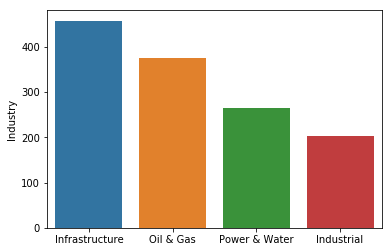

In [9]:
#visualizing the major Industries

sns.barplot(x=df.Industry.value_counts().index, y=df.Industry.value_counts())


### Most of the project contribution comes from Infrastructure and  Oil&Gas Industries. The least contribution to projects is from Industrial industry.

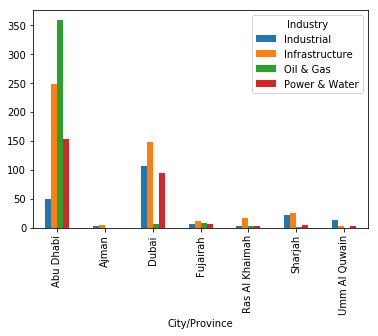

In [10]:
#visualizing the major industries in different cities

df.groupby(['City/Province','Industry']).size().unstack().plot(kind='bar')


### Majority of projects comes from Abu Dhabi. Ajman stands down the line with only few projects. 

In [11]:
#grouping project values into range

df.loc[df.ProjectValue_USdollars_Mn< 500 , 'Project value group'] = '<500'


In [12]:
df.loc[(df.ProjectValue_USdollars_Mn> 500)&(df.ProjectValue_USdollars_Mn<=1000) , 'Project value group'] = '500-1000'
df.loc[(df.ProjectValue_USdollars_Mn > 1000)&(df.ProjectValue_USdollars_Mn<=2000) , 'Project value group'] = '1000-2000'
df.loc[(df.ProjectValue_USdollars_Mn > 2000)&(df.ProjectValue_USdollars_Mn<=4000) , 'Project value group'] = '2000-4000'
df.loc[(df.ProjectValue_USdollars_Mn > 4000)&(df.ProjectValue_USdollars_Mn<=5000) , 'Project value group'] = '4000-5000'
df.loc[df.ProjectValue_USdollars_Mn >5000 , 'Project value group'] = '>5000'

In [13]:
df.head()

,Ref No,Name,Construction Percentage,Country,Industry,Project Status,ProjectValue_USdollars_Mn,Master Project Value (USdollars Mn),Client,City/Province,Industry Type,Project value group
0,UIS765,Etihad Rail (Emirates Railway Project) - Stage 3,0.0,United Arab Emirates,Infrastructure,Design,1200.0,0.0,"Etihad Rail, Abu Dhabi Department of Transport...",Abu Dhabi,Rail,1000-2000
1,UIS872,Etihad Rail Stage 2 - Package C,0.0,United Arab Emirates,Infrastructure,Design,1400.0,0.0,"Abu Dhabi Department of Transport (DOT), Etiha...",Dubai,Rail,1000-2000
2,UIS871,Etihad Rail Stage 2 - Package B,0.0,United Arab Emirates,Infrastructure,Design,1400.0,0.0,"Etihad Rail, Abu Dhabi Department of Transport...",Abu Dhabi,Rail,1000-2000
3,UIS283,Etihad Rail (Emirates Railway Project),0.0,United Arab Emirates,Infrastructure,Design,3402.0,11000.0,"Etihad Rail, Abu Dhabi Department of Transport...",Abu Dhabi,Rail,2000-4000
4,UPW415,Barakah Nuclear Power Plant in Abu Dhabi,72.0,United Arab Emirates,Power & Water,Construction,2500.0,0.0,Emirates Nuclear Energy Corporation (ENEC),Abu Dhabi,Power Plant,2000-4000


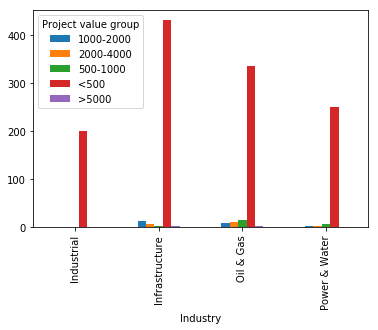

In [14]:
#visualizing project value of different Industries

df.groupby(['Industry','Project value group']).size().unstack().plot(kind='bar')


###  Majority of projects are in the project value range '<500'. Infrastructure Industry contributes more to the project value. Oil and gas Industry contributes to all ranges of project values in fair way. 


#### Performing t test to compare the avergae project values from different industries.


In [15]:
from math import sqrt
from numpy import mean
from scipy.stats import sem
from scipy.stats import t


In [16]:
def independent_ttest(data1, data2, alpha):
    mean1, mean2 = data1.mean(), data2.mean()
    # calculate standard errors
    se1, se2 = sem(data1), sem(data2)
    # standard error on the difference between the samples
    sed = sqrt(se1**2.0 + se2**2.0)
    # calculate the t statistic
    t_stat = (mean1 - mean2) / sed
    # degrees of freedom
    dsf = len(data1) + len(data2) - 2
    # calculate the critical value
    cv = t.ppf(1.0 - alpha, dsf)
    # calculate the p-value
    p = (1.0 - t.cdf(abs(t_stat), dsf)) * 2.0
    # return everything
    return t_stat, dsf, cv, p




In [17]:
#Comparison of Infrastructure and Power & water industries

x = df['Industry'] == 'Infrastructure'
infra =df[x]
infra_data =  infra['ProjectValue_USdollars_Mn']

y = df['Industry'] == 'Power & Water'
powandwater =df[y]
pw_data =  powandwater['ProjectValue_USdollars_Mn']

# calculate the t test
alpha = 0.05
t_stat, dsf, cv, p = independent_ttest(infra_data, pw_data, alpha)
print('t=%.3f, dsf=%d, cv=%.3f, p=%.3f' % (t_stat, dsf, cv, p))

t=1.366, dsf=720, cv=1.647, p=0.172


In [18]:

# interpret results
if abs(t_stat) <= cv:
    print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

Accept null hypothesis that the means are equal.


#### There is no significant difference between the average project value for 'Infrastructure'  and 'Power&Water' Industries. 


In [19]:
#Comparison of Industrial and Power&water industries

x = df['Industry'] == 'Industrial'
infra =df[x]
infra_data =  infra['ProjectValue_USdollars_Mn']

y = df['Industry'] == 'Power & Water'
powandwater =df[y]
pw_data =  powandwater['ProjectValue_USdollars_Mn']

# calculate the t test
alpha = 0.05
t_stat, dsf, cv, p = independent_ttest(infra_data, pw_data, alpha)
print('t=%.3f, dsf=%d, cv=%.3f, p=%.3f' % (t_stat, dsf, cv, p))

t=-3.141, dsf=464, cv=1.648, p=0.002


In [20]:

# interpret results
if abs(t_stat) <= cv:
    print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')


Reject the null hypothesis that the means are equal.


####  There is  significant difference between the average project value for 'Industrial'  and  'Power&Water' Industries. 


In [21]:
# Avergae Projectvalues from different industries
df.groupby('Industry')['ProjectValue_USdollars_Mn'].mean()

Industry
Industrial         29.581188
Infrastructure    168.029432
Oil & Gas         242.870293
Power & Water     114.604015
Name: ProjectValue_USdollars_Mn, dtype: float64

#### The average Project value of Power & Water Industry is 85.022 more than Industrial Industry